In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv('tips.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (244, 7)

First few rows:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:

print("\nDataset Info:")
display(df.info())

print("\nDescriptive Statistics:")
display(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


None


Descriptive Statistics:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Tips')

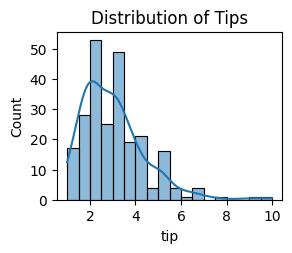

In [7]:
# Distribution of tips
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='tip', kde=True)
plt.title('Distribution of Tips')

Text(0.5, 1.0, 'Tips vs Total Bill')

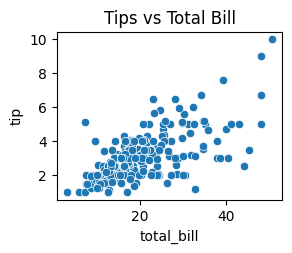

In [8]:
# Tips vs Total Bill
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Tips vs Total Bill')

Text(0.5, 1.0, 'Tips by Day')

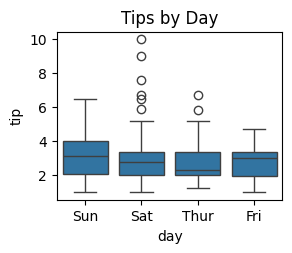

In [9]:
#  Average tips by day
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='day', y='tip')
plt.title('Tips by Day')

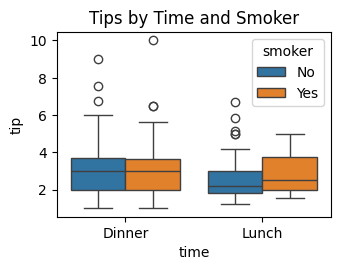

In [10]:
#  Tips by time and smoker
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='time', y='tip', hue='smoker')
plt.title('Tips by Time and Smoker')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Tips by Sex')

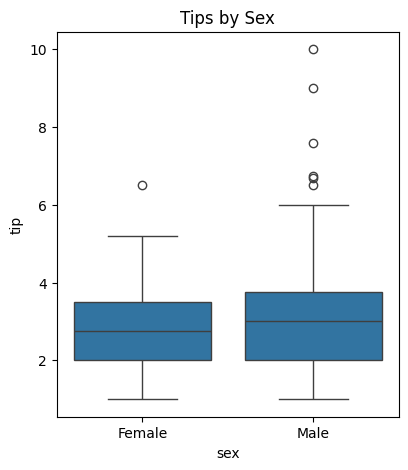

In [11]:
plt.figure(figsize=(15, 5))

# tips by gender
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='sex', y='tip')
plt.title('Tips by Sex')


Text(0.5, 1.0, 'Tips by Party Size')

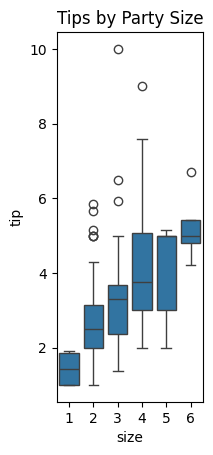

In [12]:
#tips by party size
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='size', y='tip')
plt.title('Tips by Party Size')

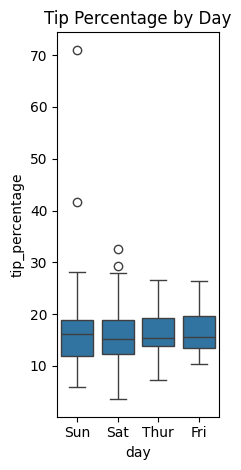

In [13]:
#Tip Percentage by Day
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='day', y='tip_percentage')
plt.title('Tip Percentage by Day')

plt.tight_layout()
plt.show()

In [14]:
X = df.drop('tip', axis=1)
y = df['tip']

In [15]:
#transforming data for use
numeric_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}


In [17]:
results = {}
for name, model in models.items():

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'RMSE': np.sqrt(mse),
        'R2': r2
    }

results_df = pd.DataFrame(results).T
display(results_df)



,MSE,RMSE,R2
Linear Regression,0.703357,0.838664,0.437302
Ridge Regression,0.700651,0.837049,0.439466
Lasso Regression,1.448668,1.203606,-0.158961
Decision Tree,1.255194,1.120354,-0.004178
Random Forest,0.918199,0.958227,0.265424
SVR,0.709525,0.842333,0.432367
KNN,0.814505,0.902499,0.348381


In [18]:
# feature importance analysis
#i don't know if this method is in syllabus,but found it on net and found it pretty amusing.
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])

rf_pipeline.fit(X_train, y_train)
rf_model = rf_pipeline.named_steps['regressor']

feature_names = (numeric_features +
                [f"{feat}_{val}" for feat, vals in
                 zip(categorical_features,
                     preprocessor.named_transformers_['cat']
                     .named_steps['onehot'].categories_)
                 for val in vals[1:]])

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)



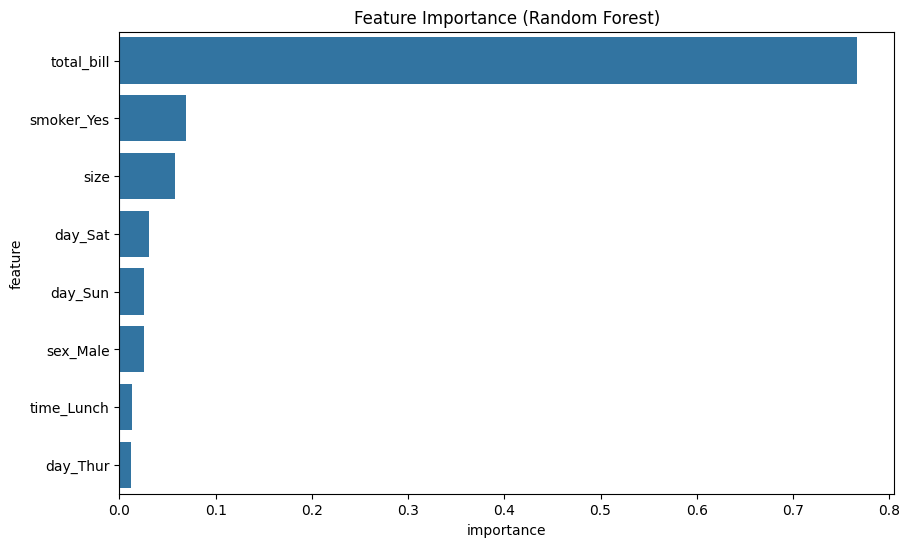

In [19]:

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [20]:
#what we learn from this
print("\nKey Insights:")
print("1. Most important factors affecting tips:")
print(feature_importance.head().to_string(index=False))

print("\n2. Average tip by day:")
print(df.groupby('day')['tip'].mean().sort_values(ascending=False))

print("\n3. Average tip percentage by time:")
print(df.groupby('time')['tip_percentage'].mean())

print("\n4. Average tip by party size:")
print(df.groupby('size')['tip'].mean().sort_values(ascending=False))


Key Insights:
1. Most important factors affecting tips:
   feature  importance
total_bill    0.767043
smoker_Yes    0.069417
      size    0.058045
   day_Sat    0.030292
   day_Sun    0.025223

2. Average tip by day:
day
Sun     3.255132
Sat     2.993103
Thur    2.771452
Fri     2.734737
Name: tip, dtype: float64

3. Average tip percentage by time:
time
Dinner    15.951779
Lunch     16.412793
Name: tip_percentage, dtype: float64

4. Average tip by party size:
size
6    5.225000
4    4.135405
5    4.028000
3    3.393158
2    2.582308
1    1.437500
Name: tip, dtype: float64


In [21]:
from scipy import stats
from statsmodels.stats.diagnostic import linear_rainbow

In [22]:
numeric_features = ['total_bill', 'size']
X_numeric = df[numeric_features]
y = df['tip']

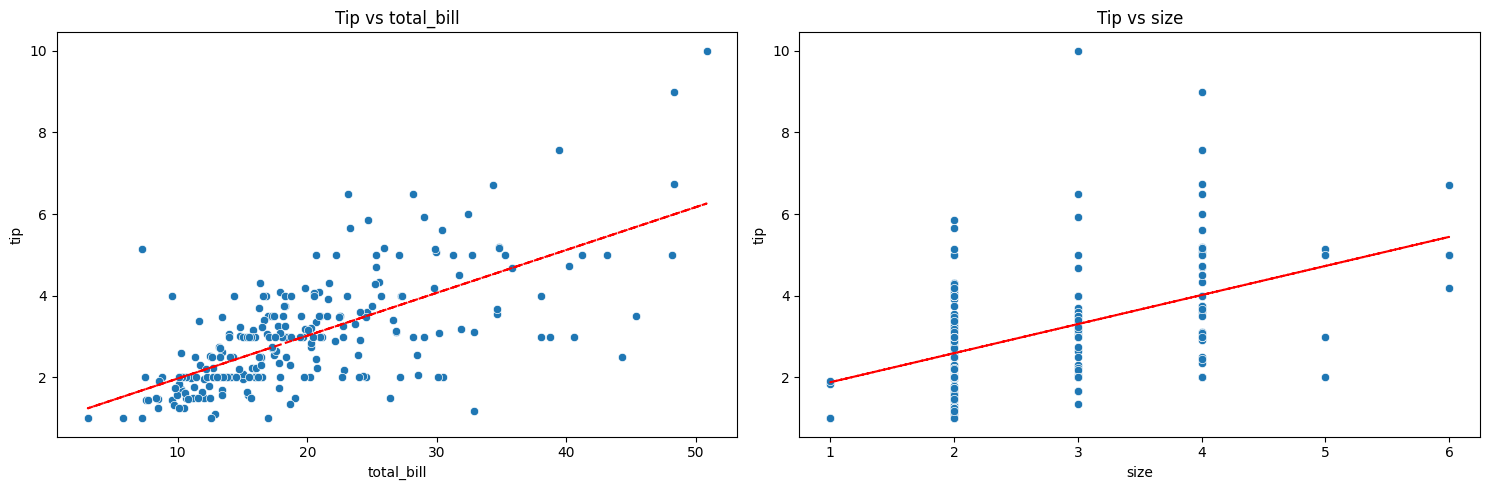

In [23]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data=df, x=feature, y='tip')
    plt.title(f'Tip vs {feature}')
    x = df[feature].values.reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    plt.plot(x, reg.predict(x), color='red', linestyle='--')
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

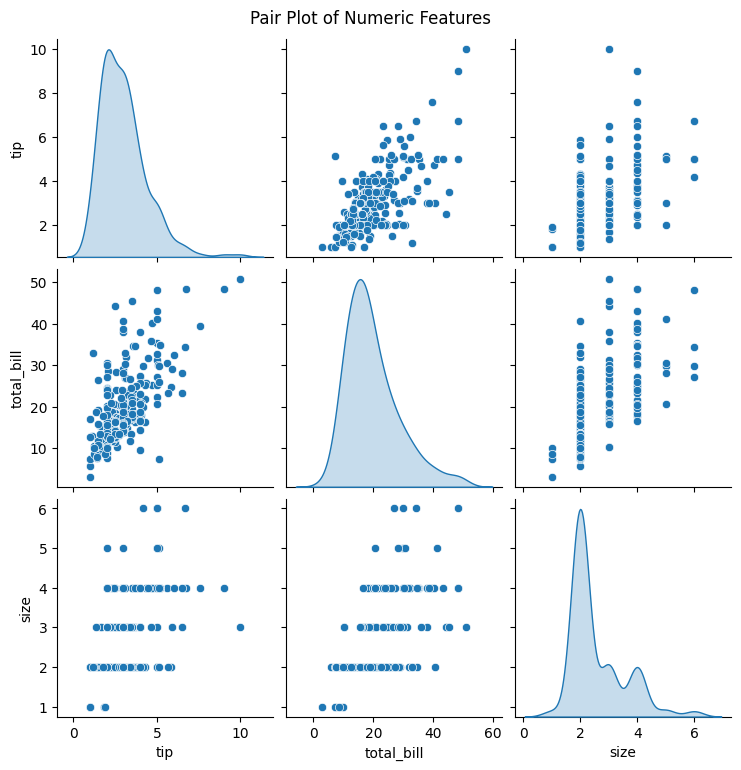

In [24]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[['tip', 'total_bill', 'size']], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

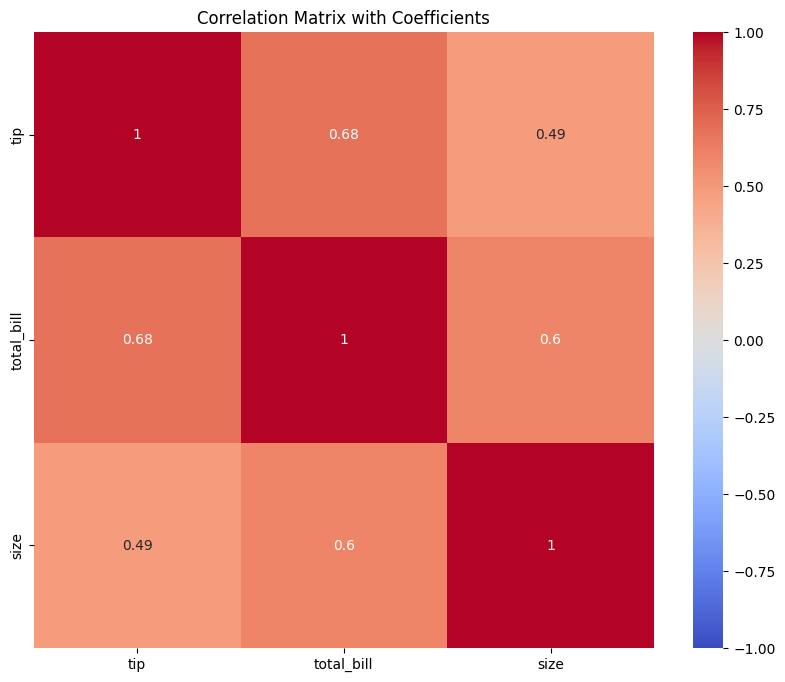


Correlation P-values:
            tip  total_bill  size
tip         0.0         0.0   0.0
total_bill  0.0         0.0   0.0
size        0.0         0.0   0.0


In [25]:


def correlation_matrix_with_pvalues(df, numeric_cols):
    corr_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols, dtype=float)
    p_values = pd.DataFrame(index=numeric_cols, columns=numeric_cols, dtype=float)

    for i in numeric_cols:
        for j in numeric_cols:
            pearson_coef, p_value = stats.pearsonr(df[i], df[j])
            corr_matrix.loc[i, j] = pearson_coef
            p_values.loc[i, j] = p_value

    return corr_matrix, p_values

numeric_cols = ['tip', 'total_bill', 'size']
corr_matrix, p_values = correlation_matrix_with_pvalues(df, numeric_cols)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix with Coefficients')
plt.show()

print("\nCorrelation P-values:")
print(p_values.round(4))


In [26]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.preprocessing import StandardScaler

X = df[['total_bill', 'size']]
y = df['tip']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled).fit()

rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print(f"\nRainbow Test Results:")
print(f"Statistic: {rainbow_statistic:.4f}")
print(f"P-value: {rainbow_p_value:.4f}")
print(f"Linear assumption {'rejected' if rainbow_p_value < 0.05 else 'not rejected'} at 5% significance level")



Rainbow Test Results:
Statistic: 1.1903
P-value: 0.1705
Linear assumption not rejected at 5% significance level


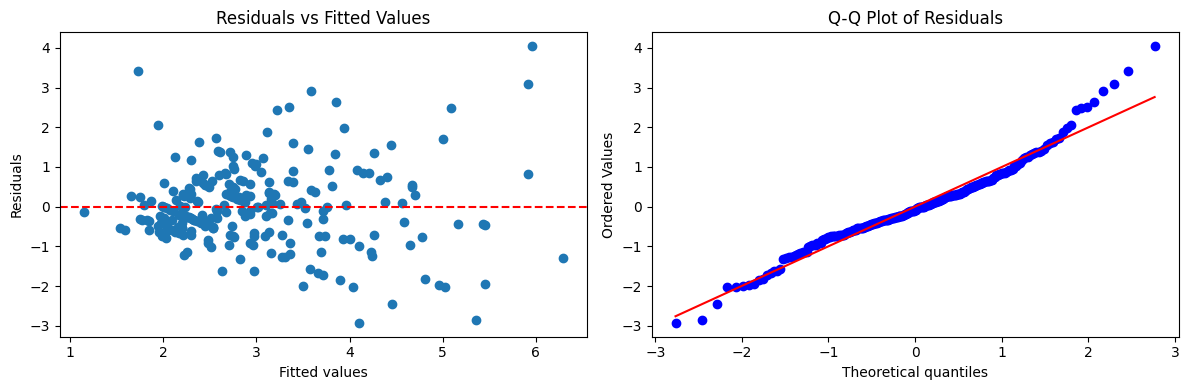

In [27]:

model = LinearRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
residuals = y - y_pred

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

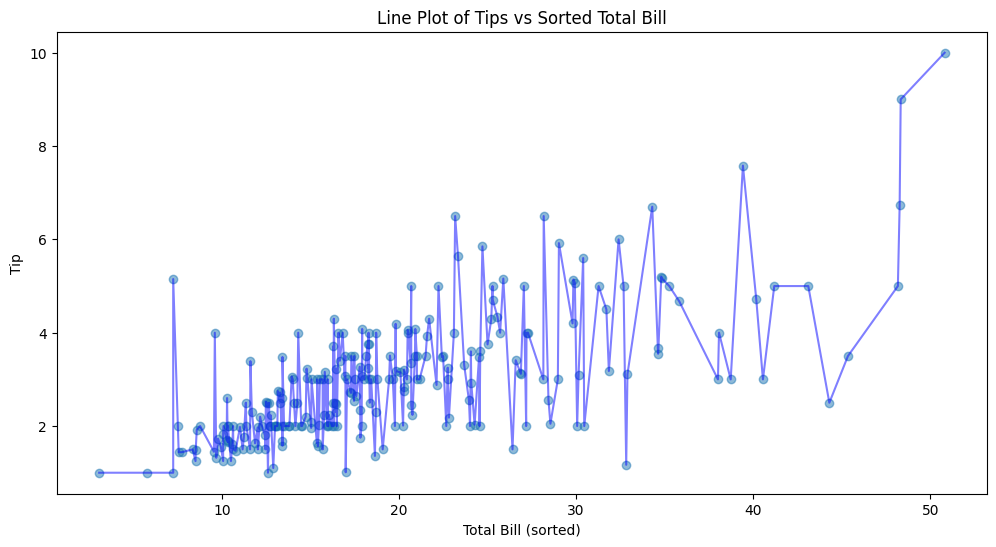

In [28]:
plt.figure(figsize=(12, 6))
sorted_df = df.sort_values('total_bill')
plt.plot(sorted_df['total_bill'], sorted_df['tip'], 'b-', alpha=0.5)
plt.scatter(sorted_df['total_bill'], sorted_df['tip'], alpha=0.5)
plt.xlabel('Total Bill (sorted)')
plt.ylabel('Tip')
plt.title('Line Plot of Tips vs Sorted Total Bill')
plt.show()


In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree=2)': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('regression', LinearRegression())
    ]),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [30]:
results = {}
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'RMSE': np.sqrt(mse),
        'R2': r2
    }


In [31]:
results_df = pd.DataFrame(results).T
print("\nModel Comparison Results:")
print(results_df.round(4))



Model Comparison Results:
                                     MSE    RMSE      R2
Linear Regression                 0.6486  0.8054  0.4811
Polynomial Regression (degree=2)  0.7599  0.8717  0.3921
Ridge Regression                  0.6484  0.8052  0.4813
Lasso Regression                  1.4487  1.2036 -0.1590
Random Forest                     0.8314  0.9118  0.3349


In [32]:
print("\nConclusions:")
print("1. Linearity Assessment:")
print(f"   - Rainbow test p-value: {rainbow_p_value:.4f}")
print("   - Correlation analysis shows:", end=" ")
if corr_matrix.loc['tip', 'total_bill'] > 0.7:
    print("strong linear relationship with total_bill")
else:
    print("moderate to weak linear relationship with total_bill")

print("\n2. Best Performing Model:")
best_model = results_df['R2'].idxmax()
print(f"   - {best_model} (R² = {results_df.loc[best_model, 'R2']:.4f})")

print("\n3. Recommendations:")
if rainbow_p_value < 0.05 or results_df.loc['Polynomial Regression (degree=2)', 'R2'] > results_df.loc['Linear Regression', 'R2']:
    print("   - Consider using non-linear models due to presence of non-linear patterns")
else:
    print("   - Linear regression methods are appropriate for this dataset")


Conclusions:
1. Linearity Assessment:
   - Rainbow test p-value: 0.1705
   - Correlation analysis shows: moderate to weak linear relationship with total_bill

2. Best Performing Model:
   - Ridge Regression (R² = 0.4813)

3. Recommendations:
   - Linear regression methods are appropriate for this dataset
